Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [3]:
df = pd.read_csv('Dataset/car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
# checking the distribution of categorical data
print(df['Fuel_Type'].value_counts())
print(df['Seller_Type'].value_counts())
print(df['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [17]:
# Encoding the categorical columns

# 1. Fuel_Type
df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
# 2. Seller_Type
df.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace=True)
# 3. Transmission
df.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace=True)


/tmp/ipykernel_8712/553925732.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
/tmp/ipykernel_8712/553925732.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace=True)
/tmp/ipykernel_8712/553925732.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting Data Training and Test

In [19]:
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [20]:
# Training and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

Model Training:

1. Linear Regression

In [21]:
lin_reg = LinearRegression()

In [22]:
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Model Evaluation

In [23]:
# Prediction on training Data
training_data_prediction = lin_reg.predict(X_train)

In [26]:
# R Squared Error
training_accuracy = metrics.r2_score(y_train, training_data_prediction) 
print("R Squared Error on Training Data : ", training_accuracy)

R Squared Error on Training Data :  0.879945166049371


Visualize the actual prices and Predicted

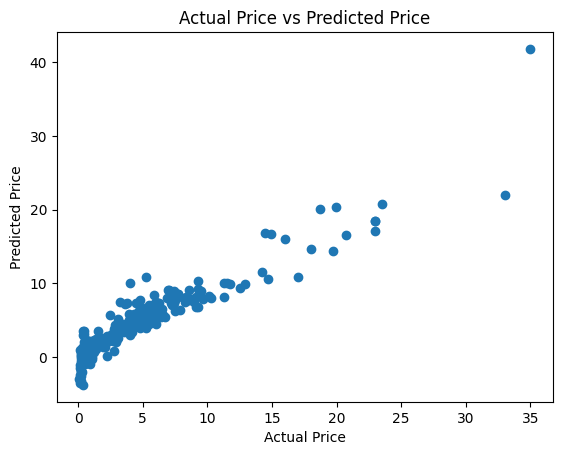

In [28]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [30]:
# Prediction on Test Data
test_data_prediction = lin_reg.predict(X_test)


In [31]:
# R2 Squared Error
test_data_accuracy = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error on Test Data : ", test_data_accuracy)

R Squared Error on Test Data :  0.8365766715027515


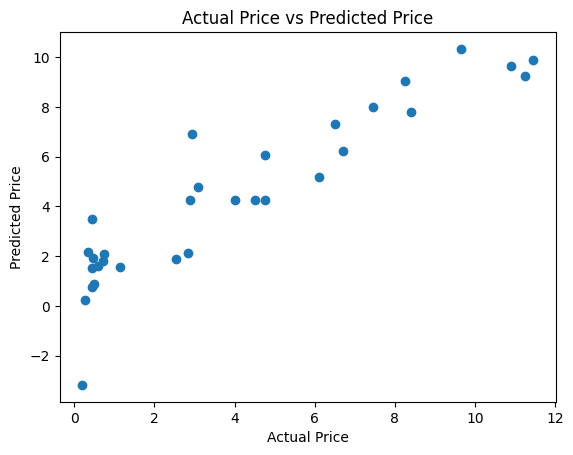

In [33]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

2. Lasso Regression

In [34]:
lasso_reg = Lasso()

In [35]:
# fit the model
lasso_reg.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [ ]:
# Prediction on Lasso Regression Test Data
test_lasso_prediction = lasso_reg.predict(X_test)

In [ ]:
#R2 Squared Error
test_data_accuracy = metrics.r2_score(y_test, test_lasso_prediction)
print("R Squared Error on Test Data : ", test_data_accuracy)

R Squared Error on Test Data :  0.8709167941173201


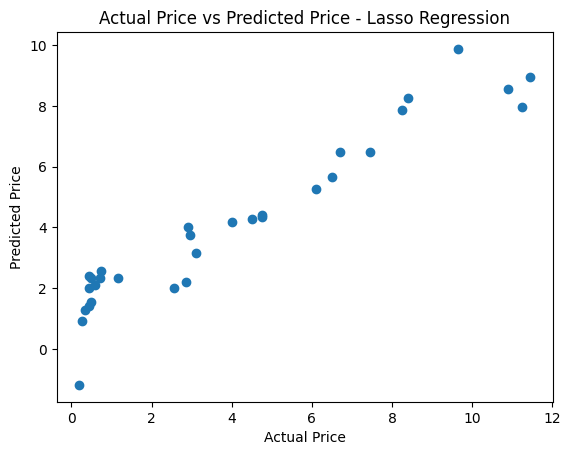

In [44]:
# plt scatter on lasso regression
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price - Lasso Regression")
plt.show()